# BANJIR: PERSIAPAN DATASET-A

---

In [1]:
# import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb

from sklearn.metrics import mean_absolute_error

from scipy.signal import savgol_filter

In [2]:
# setting
# display max columns
pd.set_option('display.max_columns', None)

## - DATA UNDERSTANDING

Dataset:

1. Data banjir,
> - menggunakan data dari PATRIOT-Net, yaitu data sensor B-401
> - lokasi acuan: Batu Gadang, Padang. Long,lat: (-0.955531,100.477179)
> - rentang data: 03/06/2022 - 12/11/2022 
> - sumber: https://patriotnet.id/

2. Data cuaca,
> - menggunakan data dari web Visual Crossing
> - lokasi acuan: Padang (-0.955531,100.477179)
> - rentang data: 03/06/2022 - 12/11/2022 
> - sumber: https://www.visualcrossing.com/

In [3]:
# read data
b401_raw = pd.read_csv('dataset/dataset_raw/sensor_B401_raw.csv') # data banjir awal yang masih kotor
b401_raw_cleaned = pd.read_csv('dataset/dataset_raw/sensor_B401_raw_cleaned.csv') # data banjir setelah menghilangkan anomali
cuaca_raw = pd.read_csv('dataset/dataset_raw/weather_visualcrossing.csv') # data cuaca 

### Data Banjir (raw)

Data ini merupakan data mentah yang diambil dari PATRIOT-Net

In [4]:
b401_raw

,Date,Day,Battery,Height
0,03/06/2022 00:02,03/06/2022,12.42,18.13
1,03/06/2022 00:12,03/06/2022,12.42,6.00
2,03/06/2022 00:23,03/06/2022,12.42,24.20
3,03/06/2022 00:26,03/06/2022,12.42,198.18
4,03/06/2022 00:33,03/06/2022,12.42,-339.94
...,...,...,...,...
19517,12/11/2022 23:34,12/11/2022,11.27,117.26
19518,12/11/2022 23:41,12/11/2022,11.24,-400.63
19519,12/11/2022 23:45,12/11/2022,11.24,-248.90
19520,12/11/2022 23:48,12/11/2022,11.24,99.05


In [5]:
b401_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19522 entries, 0 to 19521
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     19522 non-null  object 
 1   Day      19522 non-null  object 
 2   Battery  19522 non-null  float64
 3   Height   19522 non-null  float64
dtypes: float64(2), object(2)
memory usage: 610.2+ KB


In [6]:
b401_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
Battery,19522.0,11.664755,0.398244,10.81,11.41,11.61,11.86,13.10
Height,19522.0,13.539526,145.665317,-402.65,30.27,48.48,80.85,451.06


Pada kolom 'Height' terdapat anomali yaitu nilai minus dan nilai max yang sangat tinggi, anomali ini akan dihilangkan.

Text(0, 0.5, 'Height (cm)')

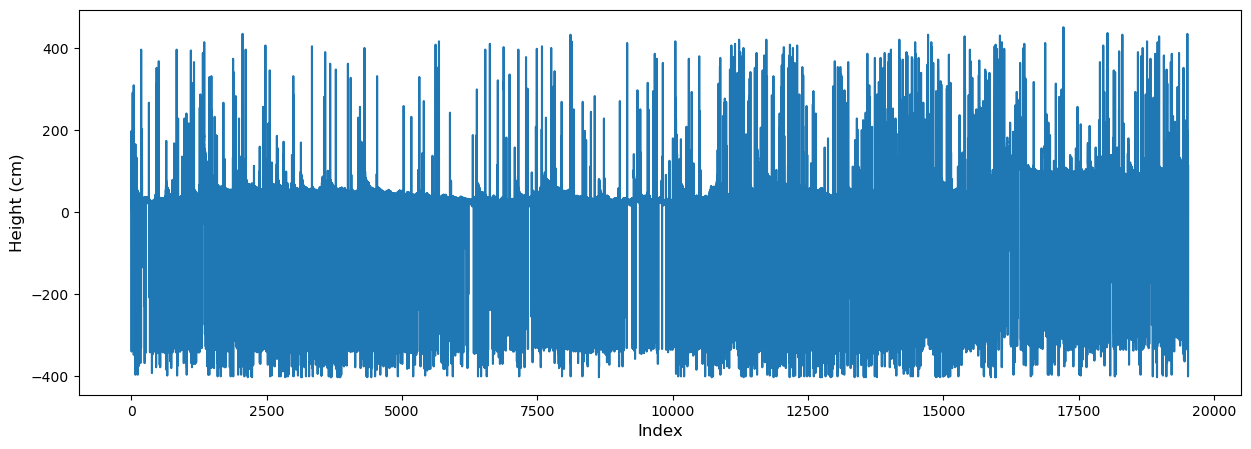

In [7]:
# bentuk data
plt.figure(figsize=(15, 5))
plt.plot(b401_raw['Height'], '-')
plt.xlabel('Index', fontsize= 12)
plt.ylabel('Height (cm)', fontsize= 12)

Text(0, 0.5, 'Height (cm)')

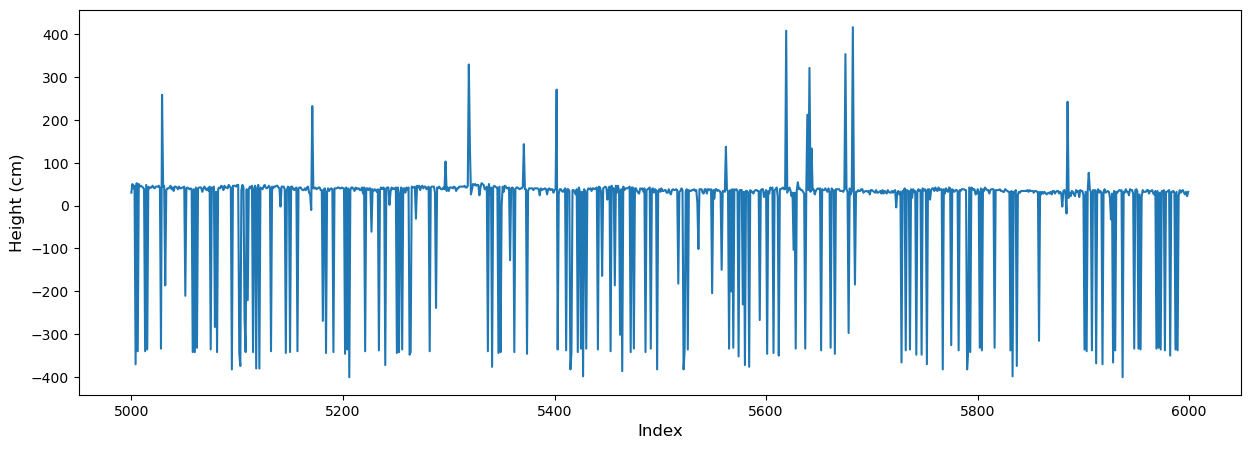

In [8]:
# bentuk data (sample)
plt.figure(figsize=(15, 5))
plt.plot(b401_raw['Height'][5000:6000], '-')
plt.xlabel('Index', fontsize= 12)
plt.ylabel('Height (cm)', fontsize= 12)

### Data Banjir (cleaned)
Data ini telah melewati pembersihan anomali

In [9]:
b401_raw_cleaned

,Date,Day,Battery,Height
0,03/06/2022 00:02,03/06/2022,12.42,24.20
1,03/06/2022 00:12,03/06/2022,12.42,NaN
2,03/06/2022 00:23,03/06/2022,12.42,24.20
3,03/06/2022 00:26,03/06/2022,12.42,NaN
4,03/06/2022 00:33,03/06/2022,12.42,NaN
...,...,...,...,...
19517,12/11/2022 23:34,12/11/2022,11.27,117.26
19518,12/11/2022 23:41,12/11/2022,11.24,NaN
19519,12/11/2022 23:45,12/11/2022,11.24,NaN
19520,12/11/2022 23:48,12/11/2022,11.24,NaN


In [10]:
b401_raw_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19522 entries, 0 to 19521
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     19522 non-null  object 
 1   Day      19522 non-null  object 
 2   Battery  19522 non-null  float64
 3   Height   14200 non-null  float64
dtypes: float64(2), object(2)
memory usage: 610.2+ KB


In [11]:
b401_raw_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Battery,19522.0,11.664755,0.398244,10.81,11.41,11.61,11.86,13.10
Height,14200.0,65.333808,34.203176,18.13,38.36,54.55,88.94,250.78


Text(0, 0.5, 'Height (cm)')

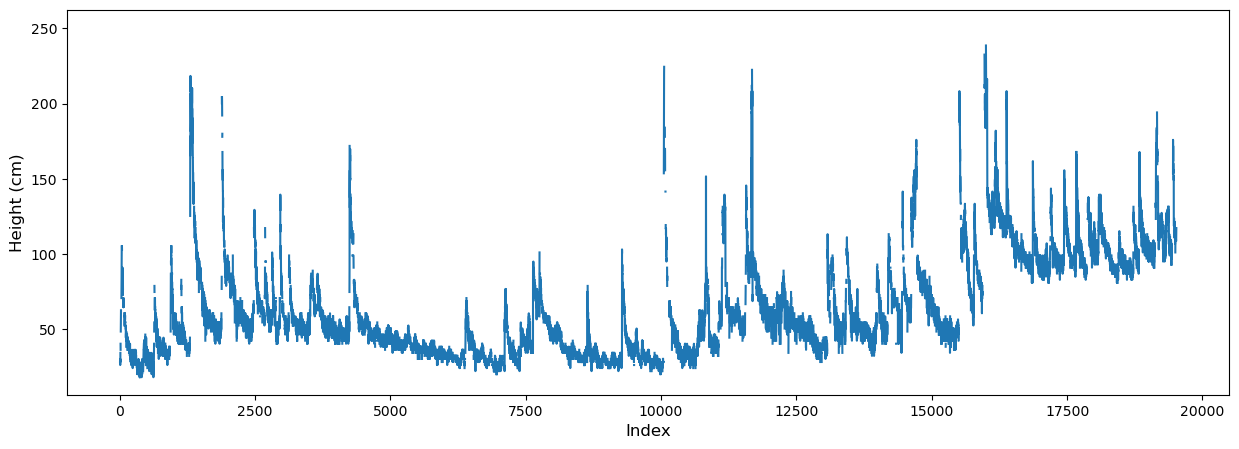

In [12]:
# bentuk data
plt.figure(figsize=(15, 5))
plt.plot(b401_raw_cleaned['Height'], '-')
plt.xlabel('Index', fontsize= 12)
plt.ylabel('Height (cm)', fontsize= 12)

Text(0, 0.5, 'Height (cm)')

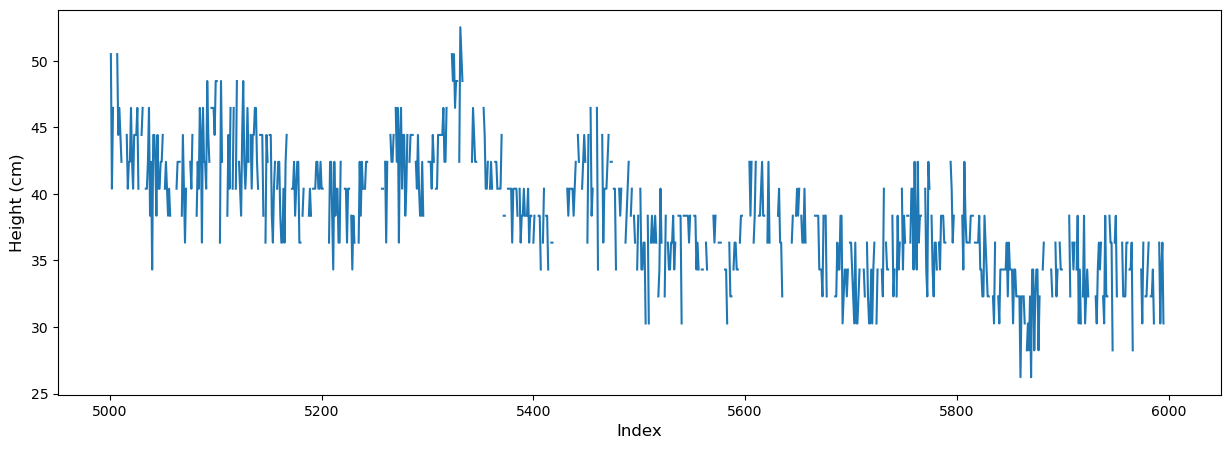

In [13]:
# bentuk sebaran data
plt.figure(figsize=(15, 5))
plt.plot(b401_raw_cleaned['Height'][5000:6000], '-')
plt.xlabel('Index', fontsize= 12)
plt.ylabel('Height (cm)', fontsize= 12)

Terlihat, anomali pada data telah dihilangkan sehingga terdapat beberapa missing value. Missing value akan diisi dengan metode *data imputation* (interpolasi dan regresi)

In [14]:
# missing data
print('Total jumlah data:', len(b401_raw_cleaned))
print('Jumlah missing data:', b401_raw_cleaned.Height.isnull().sum())
print('Persentase jumlah missing data:', (b401_raw_cleaned.Height.isnull().sum()*100/len(b401_raw_cleaned)).round(2), '%')

Total jumlah data: 19522
Jumlah missing data: 5322
Persentase jumlah missing data: 27.26 %


**Note:**
- Kolom yang tidak digunakan akan dibuang
- Ubah date time sesuai format
- Terdapat missing value akibat penghapusan anomali (akan ditangani dengan interpolasi)
- Terdapat missing value akibat timeskip karena sensor tidak aktif 

  (akan ditangani dengan model machine learning menggunakan gabungan data banjir dan cuaca, variabel yang berasal dari data cuaca digunakan untuk memprediksi variabel 'height')

- Interval waktu pada data banjir tidak sama 
  
  (akan di-resample agar interval sama, karena prediksi menggunakan timeseries membutuhkan data dengan interval yang sama)

### Data Cuaca

In [15]:
cuaca_raw

,datetime,temp,feelslike,dew,humidity,precip,precipprob,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,severerisk
0,2022-06-03T00:00:00,18.7,18.7,17.6,93.32,0.0,0,3.6,4.7,68.5,1014,100.0,24.1,10
1,2022-06-03T01:00:00,18.8,18.8,17.5,92.16,0.0,0,4.0,5.4,73.8,1013,100.0,24.1,10
2,2022-06-03T02:00:00,18.9,18.9,17.4,91.01,0.0,0,4.0,5.4,73.9,1012,100.0,24.1,10
3,2022-06-03T03:00:00,19.1,19.1,17.4,89.88,0.0,0,4.3,6.1,80.2,1012,100.0,24.1,10
4,2022-06-03T04:00:00,19.4,19.4,17.3,87.66,0.0,0,4.0,5.0,76.7,1011,98.9,24.1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,2022-11-12T19:00:00,20.6,20.6,20.5,99.39,0.0,0,1.4,1.4,115.4,1010,100.0,1.9,10
3908,2022-11-12T20:00:00,20.6,20.6,20.4,98.77,0.0,0,1.1,1.4,92.5,1011,100.0,1.3,10
3909,2022-11-12T21:00:00,20.5,20.5,20.2,98.16,0.1,100,1.1,1.4,83.5,1012,100.0,1.7,10
3910,2022-11-12T22:00:00,20.4,20.4,20.1,98.16,0.1,100,1.8,1.8,96.7,1012,100.0,1.7,10


In [16]:
cuaca_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3912 entries, 0 to 3911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          3912 non-null   object 
 1   temp              3912 non-null   float64
 2   feelslike         3912 non-null   float64
 3   dew               3912 non-null   float64
 4   humidity          3912 non-null   float64
 5   precip            3912 non-null   float64
 6   precipprob        3912 non-null   int64  
 7   windgust          3912 non-null   float64
 8   windspeed         3912 non-null   float64
 9   winddir           3912 non-null   float64
 10  sealevelpressure  3912 non-null   int64  
 11  cloudcover        3912 non-null   float64
 12  visibility        3912 non-null   float64
 13  severerisk        3912 non-null   int64  
dtypes: float64(10), int64(3), object(1)
memory usage: 428.0+ KB


In [17]:
cuaca_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,3912.0,21.656570,2.629999,17.50,19.6000,20.50,23.70,29.8
feelslike,3912.0,21.714545,2.768646,17.50,19.6000,20.50,23.70,31.0
dew,3912.0,19.306186,1.374440,13.90,18.5000,19.30,20.20,23.2
humidity,3912.0,87.563298,12.125224,45.86,81.6025,92.82,96.41,100.0
precip,3912.0,0.403655,1.427023,0.00,0.0000,0.00,0.30,33.6
precipprob,3912.0,43.507157,49.582975,0.00,0.0000,0.00,100.00,100.0
windgust,3912.0,4.759509,2.367873,0.40,3.2000,4.30,6.10,26.3
windspeed,3912.0,4.374872,1.997276,0.00,2.9000,4.30,5.80,11.5
winddir,3912.0,159.286682,96.700031,0.20,77.0000,102.20,255.50,359.8
sealevelpressure,3912.0,1011.591513,1.718880,1007.00,1010.0000,1012.00,1013.00,1017.0


**Note:**
- Ubah date time sesuai format
- Kolom yang tidak diperlukan --> drop

## - DATA CLEANING

### Data Banjir

In [18]:
b401_raw_cleaned.head()

,Date,Day,Battery,Height
0,03/06/2022 00:02,03/06/2022,12.42,24.2
1,03/06/2022 00:12,03/06/2022,12.42,NaN
2,03/06/2022 00:23,03/06/2022,12.42,24.2
3,03/06/2022 00:26,03/06/2022,12.42,NaN
4,03/06/2022 00:33,03/06/2022,12.42,NaN


In [19]:
# membuang kolom yang tidak perlu
b401_cleaned = b401_raw_cleaned.drop(columns = ['Day', 'Battery'])

# mengganti nama kolom
b401_cleaned.columns = ['date', 'height']

# menyesuaikan format date
b401_cleaned['date'] = b401_cleaned['date'] + ':00'
b401_cleaned['date'] = pd.to_datetime(b401_cleaned['date'], format='%d/%m/%Y %H:%M:%S')

# mengisi missing value dari anomali dengan interpolasi
print('(Sebelum interpolasi) --- Jumlah missing value: ', b401_cleaned.height.isnull().sum())
b401_cleaned['height'] = b401_cleaned['height'].fillna(b401_cleaned['height'].interpolate()).round(2)
print('(Setelah interpolasi) --- Jumlah missing value: ', b401_cleaned.height.isnull().sum())

(Sebelum interpolasi) --- Jumlah missing value:  5322
(Setelah interpolasi) --- Jumlah missing value:  0


Text(0, 0.5, 'Height (cm)')

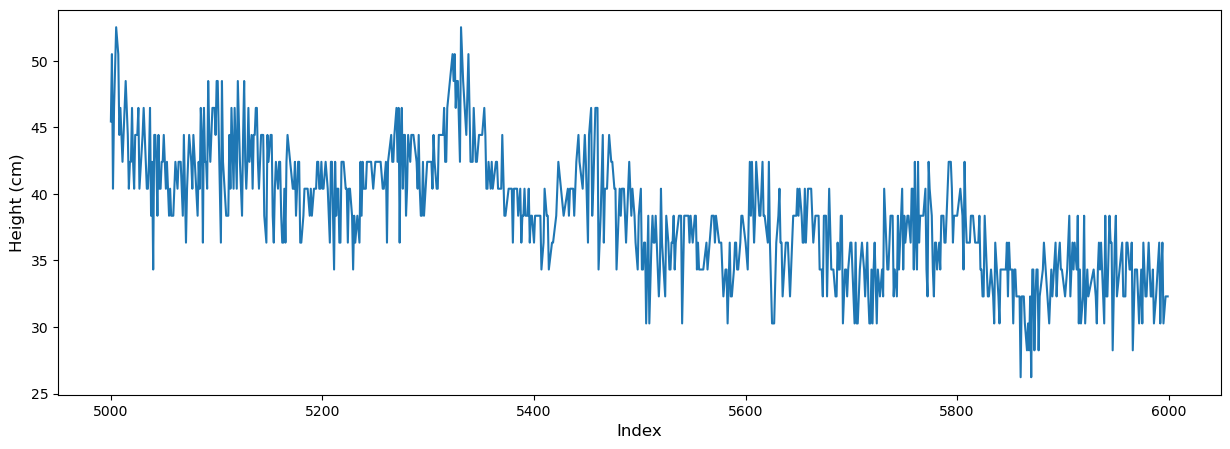

In [20]:
# bentuk sebaran sample data
plt.figure(figsize=(15, 5))
plt.plot(b401_cleaned['height'][5000:6000], '-')
plt.xlabel('Index', fontsize= 12)
plt.ylabel('Height (cm)', fontsize= 12)

In [21]:
# resample 10 menit
print('\n(Sebelum resample) --- Jumlah baris: ', len(b401_cleaned))
b401_cleaned = b401_cleaned.set_index('date')
b401_cleaned = b401_cleaned.resample('10min').mean().round(2)
print('(Setelah resample) --- Jumlah baris: ', len(b401_cleaned))
print('(Setelah resample) --- Jumlah missing value: ', b401_cleaned.height.isnull().sum())
print('(Setelah resample) --- Persentase jumlah missing value:', (b401_cleaned.height.isnull().sum()*100/len(b401_cleaned)).round(2), '%')

# reset index
b401_cleaned = b401_cleaned.reset_index()


(Sebelum resample) --- Jumlah baris:  19522
(Setelah resample) --- Jumlah baris:  23472
(Setelah resample) --- Jumlah missing value:  8376
(Setelah resample) --- Persentase jumlah missing value: 35.69 %


Text(0, 0.5, 'Height (cm)')

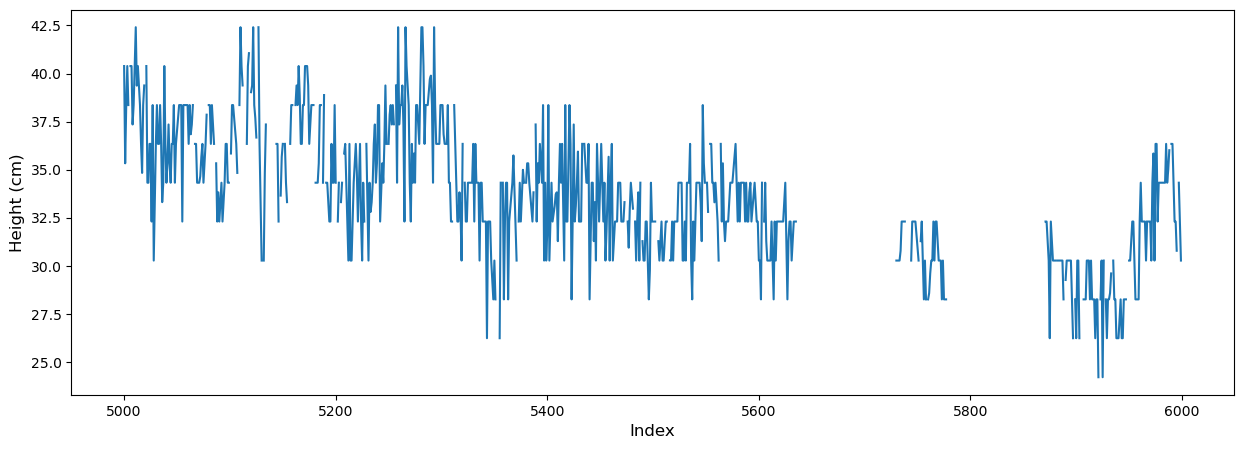

In [22]:
# bentuk data setelah resample
plt.figure(figsize=(15, 5))
plt.plot(b401_cleaned['height'][5000:6000], '-')
plt.xlabel('Index', fontsize= 12)
plt.ylabel('Height (cm)', fontsize= 12)

Terlihat ada missing value setelah datetime di-resample karena adanya timeskip pada data akibat sensor tidak aktif dalam kurun waktu tertentu

### Data Cuaca

In [23]:
cuaca_cleaned = cuaca_raw.copy()
cuaca_cleaned.head()

,datetime,temp,feelslike,dew,humidity,precip,precipprob,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,severerisk
0,2022-06-03T00:00:00,18.7,18.7,17.6,93.32,0.0,0,3.6,4.7,68.5,1014,100.0,24.1,10
1,2022-06-03T01:00:00,18.8,18.8,17.5,92.16,0.0,0,4.0,5.4,73.8,1013,100.0,24.1,10
2,2022-06-03T02:00:00,18.9,18.9,17.4,91.01,0.0,0,4.0,5.4,73.9,1012,100.0,24.1,10
3,2022-06-03T03:00:00,19.1,19.1,17.4,89.88,0.0,0,4.3,6.1,80.2,1012,100.0,24.1,10
4,2022-06-03T04:00:00,19.4,19.4,17.3,87.66,0.0,0,4.0,5.0,76.7,1011,98.9,24.1,10


In [24]:
# menyesuaikan format date
cuaca_cleaned['datetime'] = cuaca_cleaned['datetime'].replace('T',' ')
cuaca_cleaned['datetime'] = pd.to_datetime(cuaca_cleaned['datetime'], format='%Y-%m-%d %H:%M:%S')

## - MERGE

In [25]:
b401_cleaned.head(3)

,date,height
0,2022-06-03 00:00:00,24.20
1,2022-06-03 00:10:00,24.20
2,2022-06-03 00:20:00,24.88


In [26]:
cuaca_cleaned.head(3)

,datetime,temp,feelslike,dew,humidity,precip,precipprob,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,severerisk
0,2022-06-03 00:00:00,18.7,18.7,17.6,93.32,0.0,0,3.6,4.7,68.5,1014,100.0,24.1,10
1,2022-06-03 01:00:00,18.8,18.8,17.5,92.16,0.0,0,4.0,5.4,73.8,1013,100.0,24.1,10
2,2022-06-03 02:00:00,18.9,18.9,17.4,91.01,0.0,0,4.0,5.4,73.9,1012,100.0,24.1,10


In [27]:
print('Bentuk data banjir : ', b401_cleaned.shape)
print('Bentuk data cuaca  : ', cuaca_cleaned.shape)

Bentuk data banjir :  (23472, 2)
Bentuk data cuaca  :  (3912, 14)


Menggabungkan data menggunakan left join untuk menyesuaikan waktu berdasarkan waktupada data banjir

In [28]:
# membuat kolom 'index_join'
b401_cleaned['index_join'] = b401_cleaned['date'].astype(str).str[:-6]
cuaca_cleaned['index_join'] = cuaca_cleaned['datetime'].astype(str).str[:-6]

In [29]:
# menggabungkan data banjir dan data cuaca dengan left join
merged_data = b401_cleaned.merge(cuaca_cleaned, on='index_join', how='left')

# membuang kolom
merged_data = merged_data.drop(columns = ['datetime', 'index_join'])

merged_data.head(3)

,date,height,temp,feelslike,dew,humidity,precip,precipprob,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,severerisk
0,2022-06-03 00:00:00,24.20,18.7,18.7,17.6,93.32,0.0,0,3.6,4.7,68.5,1014,100.0,24.1,10
1,2022-06-03 00:10:00,24.20,18.7,18.7,17.6,93.32,0.0,0,3.6,4.7,68.5,1014,100.0,24.1,10
2,2022-06-03 00:20:00,24.88,18.7,18.7,17.6,93.32,0.0,0,3.6,4.7,68.5,1014,100.0,24.1,10


In [30]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23472 entries, 0 to 23471
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              23472 non-null  datetime64[ns]
 1   height            15096 non-null  float64       
 2   temp              23472 non-null  float64       
 3   feelslike         23472 non-null  float64       
 4   dew               23472 non-null  float64       
 5   humidity          23472 non-null  float64       
 6   precip            23472 non-null  float64       
 7   precipprob        23472 non-null  int64         
 8   windgust          23472 non-null  float64       
 9   windspeed         23472 non-null  float64       
 10  winddir           23472 non-null  float64       
 11  sealevelpressure  23472 non-null  int64         
 12  cloudcover        23472 non-null  float64       
 13  visibility        23472 non-null  float64       
 14  severerisk        2347

Merged data smooth:

## - DATA IMPUTATION

Missing value akan diisi dengan data imputation menggunakan model regresi, model regresi yang akan dipakai:
- Random forest regressor
- Support vector regressor
- XGBoost regressor

### Feature Engineering
- One hot encoding fitur kategorikal
- Mengekstrak fitur datetime menjadi fitur baru untuk membantu model dalam menangkap informasi waktu

In [31]:
merged_data_smooth = merged_data.copy()

# # Daftar kolom yang akan di-smooth
# col_smooth = ['temp', 'feelslike', 'dew', 'humidity', 'precip', 'windgust', 'windspeed', 'winddir', 
#               'sealevelpressure', 'cloudcover', 'visibility']

# # Smoothing dengan metode Savitzky-Golay
# window_length = 12
# polyorder = 1

# for col in col_smooth:
#     s_data = merged_data_smooth[col].values
#     smoothed_data = savgol_filter(s_data, window_length=window_length, polyorder=polyorder)
#     merged_data_smooth[col] = smoothed_data.round(2)

# # Hasil smoothing telah diterapkan ke semua kolom dalam col_smooth

# # One Hot Encoding
# for cat in ['conditions', 'icon'] :
#     ohe = pd.get_dummies(merged_data_smooth[cat], prefix=cat)
#     merged_data_smooth = merged_data_smooth.join(ohe)

# mengekstrak datetime
merged_data_smooth['minute'] = merged_data_smooth['date'].dt.minute
merged_data_smooth['hour'] = merged_data_smooth['date'].dt.hour
merged_data_smooth['day'] = merged_data_smooth['date'].dt.day
merged_data_smooth['month'] = merged_data_smooth['date'].dt.month

In [32]:
merged_data_smooth.head(3)

,date,height,temp,feelslike,dew,humidity,precip,precipprob,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,severerisk,minute,hour,day,month
0,2022-06-03 00:00:00,24.20,18.7,18.7,17.6,93.32,0.0,0,3.6,4.7,68.5,1014,100.0,24.1,10,0,0,3,6
1,2022-06-03 00:10:00,24.20,18.7,18.7,17.6,93.32,0.0,0,3.6,4.7,68.5,1014,100.0,24.1,10,10,0,3,6
2,2022-06-03 00:20:00,24.88,18.7,18.7,17.6,93.32,0.0,0,3.6,4.7,68.5,1014,100.0,24.1,10,20,0,3,6


Memisahkan data:

In [33]:
# data untuk modeling (data tanpa missing value)
data_banjir_1 = merged_data_smooth[~merged_data_smooth['height'].isna()].reset_index(drop=True)

# data untuk diisi (hanya data dengan missing value)
data_banjir_2 = merged_data_smooth[merged_data_smooth['height'].isna()].reset_index(drop=True)

### Feature Selection
Menggunakan Pearson Correlation dengan fungsi .corr() untuk melihat korelasi antar fitur.

fitur yang berkorelasi tinggi dengan 'height' dan tidak berkorelasi tinggi dengan kolom lainnya akan dipilih sebagai prediktor

<AxesSubplot: >

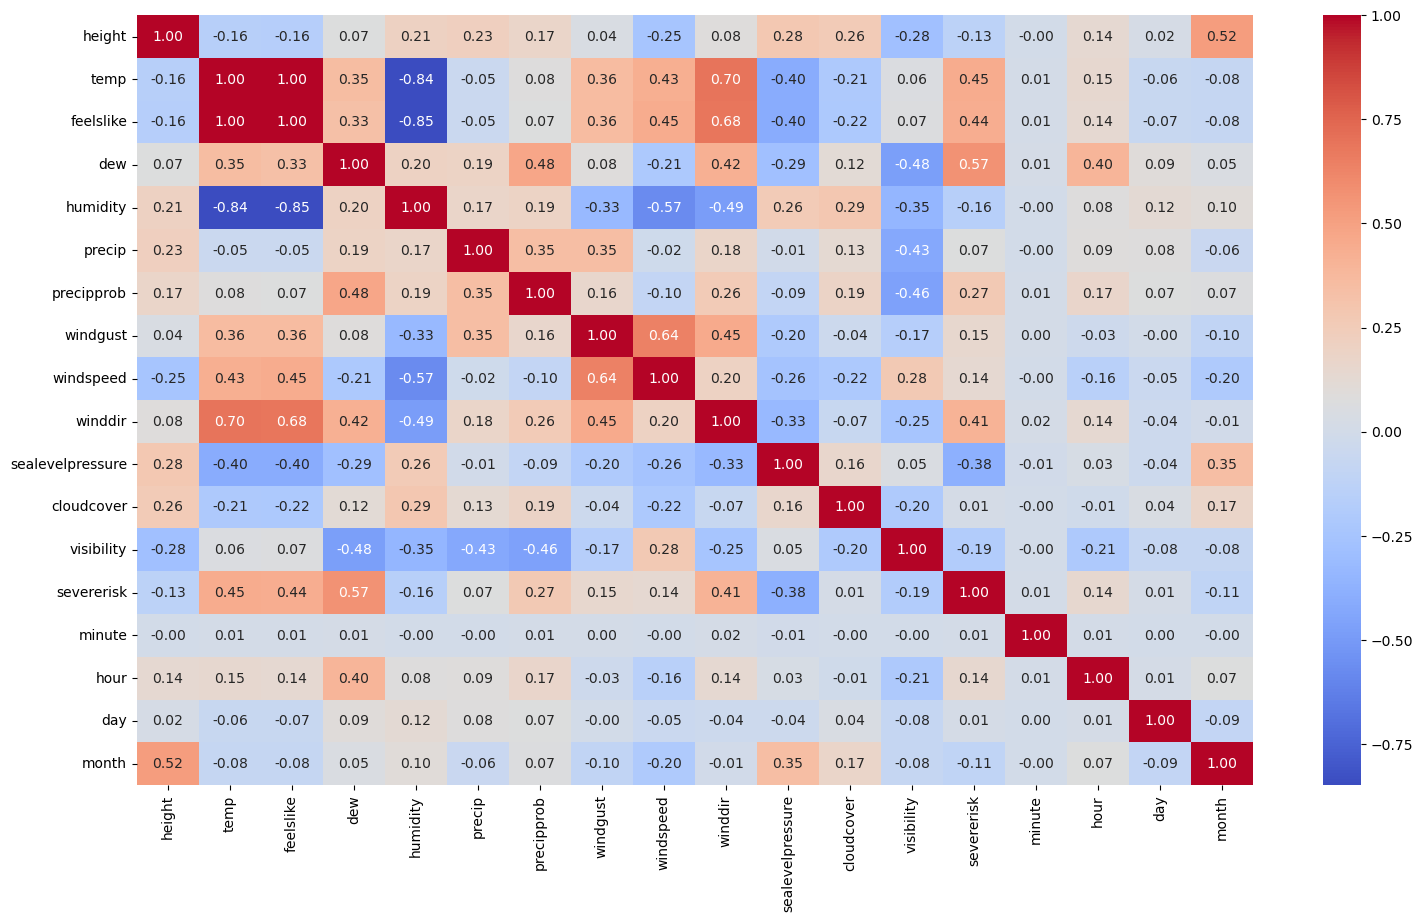

In [34]:
# cek korelasi
plt.figure(figsize=(18,10))
sns.heatmap(data_banjir_1.corr(numeric_only=True), 
            annot=True, cmap='coolwarm', fmt='.2f')

**Kesimpulan:** 
fitur dengan korelasi >= 0.7 (redundan) :
- 'temp', 
- 'feelslike',  

fitur tersebut tidak akan digunakan untuk training model regresi

In [35]:
data_banjir_1.columns

Index(['date', 'height', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'severerisk', 'minute', 'hour', 'day',
       'month'],
      dtype='object')

In [36]:
# memilih fitur
data_banjir_1 = data_banjir_1[['dew', 'humidity', 'precip', 'precipprob', 
                               'windgust', 'windspeed', 'winddir', 'sealevelpressure',
                               'cloudcover', 'visibility', 'severerisk',
                               'minute', 'hour', 'day', 'month',
                               'height']]

### Split and Scaling

In [37]:
# split
X = data_banjir_1.drop('height', axis=1)
y = data_banjir_1['height']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaling
# fit hanya pada data train agar tidak terjadi data leakage/kebocoran data
scaler_X = MinMaxScaler().fit(X_train) 

X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

### Modeling

In [38]:
# MODEL
# random forest regressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
# SVR
svr = SVR()
svr.fit(X_train, y_train)
# XGBoost Regressor
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train, y_train)

# EVAL
# dataframe untuk evaluasi model
eval = pd.DataFrame(index=['train_mae', 
                           'test_mae'], 
                    columns=['Random Forest Regressor', 
                             'Support Vector Regressor', 
                             'XGBoost Regressor'])
# MAE pada data train
eval.loc['train_mae','Random Forest Regressor'] = mean_absolute_error(y_train, rfr.predict(X_train))
eval.loc['train_mae','Support Vector Regressor'] = mean_absolute_error(y_train, svr.predict(X_train))
eval.loc['train_mae','XGBoost Regressor'] = mean_absolute_error(y_train, xgbr.predict(X_train))
# MAE pada data test
eval.loc['test_mae','Random Forest Regressor'] = mean_absolute_error(y_test, rfr.predict(X_test))
eval.loc['test_mae','Support Vector Regressor'] = mean_absolute_error(y_test, svr.predict(X_test))
eval.loc['test_mae','XGBoost Regressor'] = mean_absolute_error(y_test, xgbr.predict(X_test))
# hasil evaluasi
eval.transpose()

,train_mae,test_mae
Random Forest Regressor,1.169593,3.046745
Support Vector Regressor,15.218055,15.0466
XGBoost Regressor,2.779415,3.519376


Model regresi terbaik untuk memprediksi 'height' yaitu **`Random Forest Regressor`**

### Imputation

In [39]:
# siapkan data
X_pred = data_banjir_2[['dew', 'humidity', 'precip', 'precipprob', 
                        'windgust', 'windspeed', 'winddir', 'sealevelpressure',
                        'cloudcover', 'visibility', 'severerisk',
                        'minute', 'hour', 'day', 'month']]

# scaling
X_pred = scaler_X.transform(X_pred)

# prediksi
y_pred = rfr.predict(X_pred)
# y_pred = svr.predict(X_pred)
# y_pred = xgbr.predict(X_pred)

# Menampilkan dalam tabel
y_pred = pd.DataFrame(y_pred)
y_pred.columns = ['height_pred']
y_pred = y_pred.astype('float64')
y_pred = y_pred.round(2)
y_pred.sample(5)

,height_pred
2707,36.56
3759,50.44
1497,41.22
5330,119.11
2742,35.14


In [40]:
# menambahkan kolom date ke y_pred
date = data_banjir_2[['date']]
y_pred = pd.concat([date, y_pred.reindex(date.index)], axis=1)

# dataset final
dataset_final = merged_data.copy()
dataset_final['height_0'] = dataset_final['height'] # untuk plot data 
dataset_final = dataset_final.merge(y_pred, on='date', how='left') # menambahkan y_pred
dataset_final['height'] = dataset_final['height'].fillna(dataset_final['height_pred']) # mengisi NaN dengan y_pred

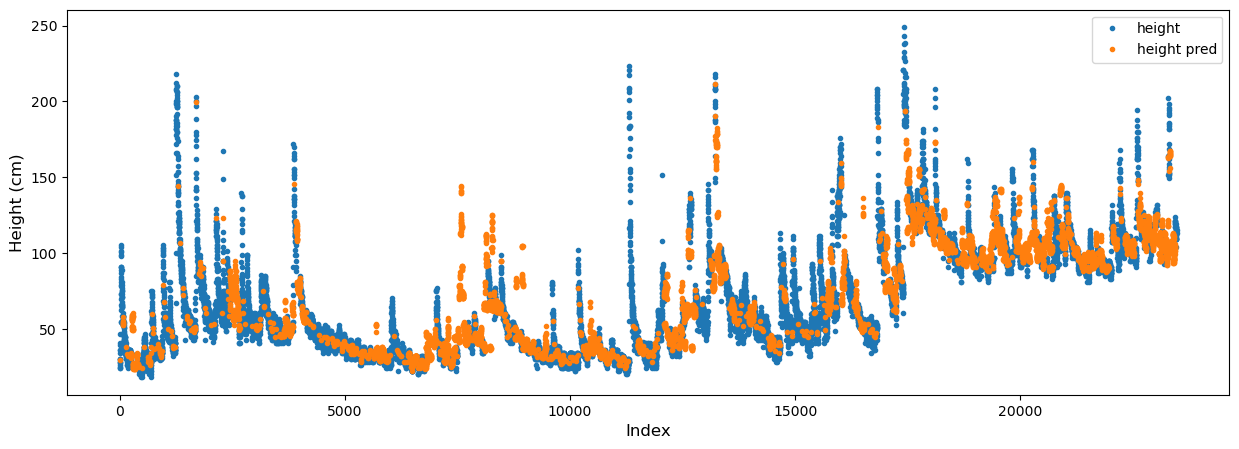

In [41]:
# bentuk sebaran data
plt.figure(figsize=(15, 5))
plt.plot(dataset_final['height_0'], '.', label='height')
plt.plot(dataset_final['height_pred'], '.', label='height pred')
plt.xlabel('Index', fontsize= 12)
plt.ylabel('Height (cm)', fontsize= 12)
plt.legend()

In [42]:
dataset_final['height'].isna().sum()

0

Data sudah tidak ada missing value, namun agar data benar-benar bersih, dilakukan pengecekan lagi untuk memastikan data bersih

In [43]:
# # save dataset
# save_data = dataset_final.copy()
# save_data.to_csv('dataset/dataset_saved-A/save_flood_imputation.csv')

## - SAVE DATASET

In [70]:
# read dataset
flood_cleaned = pd.read_csv('dataset/dataset_saved-A/save_flood_imputation_cleaned.csv')

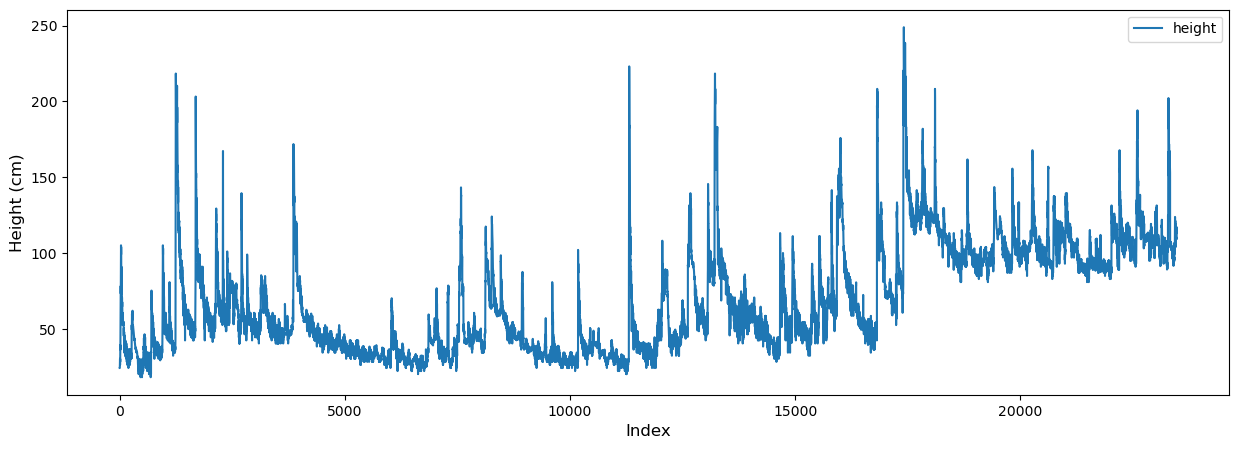

In [71]:
# bentuk sebaran data
plt.figure(figsize=(15, 5))
plt.plot(flood_cleaned['height'], '-', label='height')
plt.xlabel('Index', fontsize= 12)
plt.ylabel('Height (cm)', fontsize= 12)
plt.legend()

Karena perbandingan data musim kemarau dan data musim hujan tidak seimbang maka untuk prediksi akan dipilih data musim kemarau saja

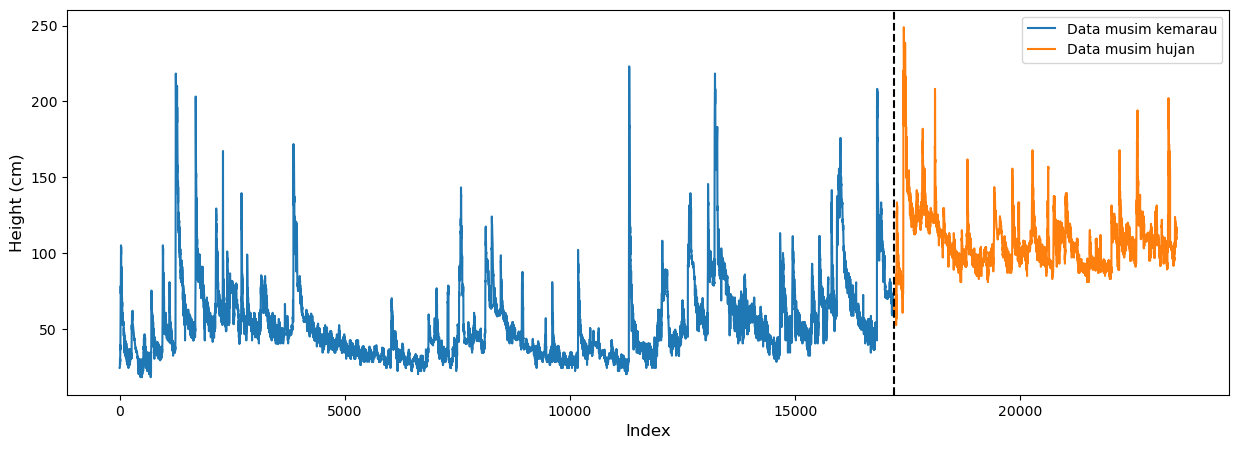

In [72]:
# plot data
plt.figure(figsize=(15, 5))
plt.plot(flood_cleaned.height[:17200], '-')
plt.plot(flood_cleaned.height[17200:], '-')
plt.xlabel('Index', fontsize= 12)
plt.ylabel('Height (cm)', fontsize= 12)
plt.axvline(17200, color='black', linestyle='--')
plt.legend(['Data musim kemarau', 'Data musim hujan'])

### 1. Dataset (no smoothing)

In [73]:
# all
flood_dataset1_all = flood_cleaned.copy()
flood_dataset1_all.to_csv('dataset/dataset_saved-A/dataset_A1/flood-A1_all.csv')

In [74]:
# split data
flood_dataset1_all = flood_dataset1_all[:17200]

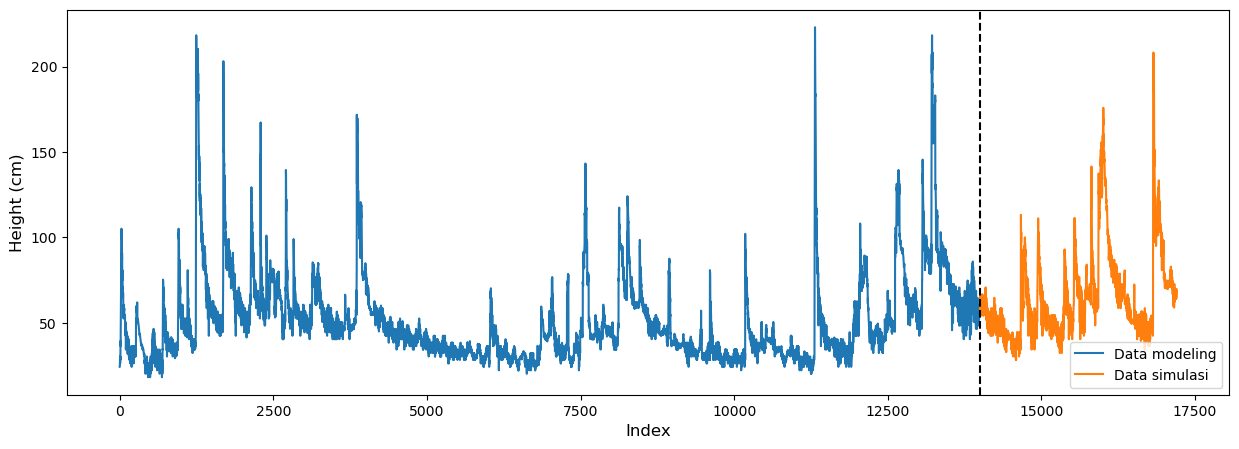

In [75]:
# plot data
plt.figure(figsize=(15, 5))
plt.plot(flood_dataset1_all.height[:14000], '-')
plt.plot(flood_dataset1_all.height[14000:], '-')
plt.xlabel('Index', fontsize= 12)
plt.ylabel('Height (cm)', fontsize= 12)
plt.axvline(14000, color='black', linestyle='--')
plt.legend(['Data modeling', 'Data simulasi'], loc='lower right')

In [76]:
# jumlah data
print('Total jumlah data modeling:', len(flood_dataset1_all[:14000]))
print('Total jumlah data simulasi:', len(flood_dataset1_all[14000:]))

Total jumlah data modeling: 14000
Total jumlah data simulasi: 3200


In [77]:
# SPLIT
# save data modeling
flood_dataset1_mod = flood_dataset1_all[:14000]
flood_dataset1_mod.to_csv('dataset/dataset_saved-A/dataset_A1/flood-A1_modeling.csv')

# save data simulasi
flood_dataset1_simulasi = flood_dataset1_all[14000:]
flood_dataset1_simulasi.to_csv('dataset/dataset_saved-A/dataset_A1/flood-A1_simulasi.csv')

### 2. Dataset (banjir smoothing)

Karena data fluktuatif, maka dilakukan smoothing agar memudahkan model prediksi untuk menangkap pola-pola dalam data

In [78]:
flood_dataset2 = flood_cleaned.copy()

In [79]:
flood_dataset2.head()

,date,height,temp,feelslike,dew,humidity,precip,precipprob,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,severerisk
0,03/06/2022 00:00,24.20,18.7,18.7,17.6,93.32,0.0,0,3.6,4.7,68.5,1014,100.0,24.1,10
1,03/06/2022 00:10,24.20,18.7,18.7,17.6,93.32,0.0,0,3.6,4.7,68.5,1014,100.0,24.1,10
2,03/06/2022 00:20,24.88,18.7,18.7,17.6,93.32,0.0,0,3.6,4.7,68.5,1014,100.0,24.1,10
3,03/06/2022 00:30,27.58,18.7,18.7,17.6,93.32,0.0,0,3.6,4.7,68.5,1014,100.0,24.1,10
4,03/06/2022 00:40,28.25,18.7,18.7,17.6,93.32,0.0,0,3.6,4.7,68.5,1014,100.0,24.1,10


In [80]:
# smoothing dengan metode Savitzky-Golay
s1 = flood_dataset2['height'].values
height_savgol1 = savgol_filter(s1, 
                               window_length=15, 
                               polyorder=1)
'''
  Semakin besar window length = semakin smooth
  Semakin besar polyorder = kurang smooth
'''
# menyimpan hasil smoothing
flood_dataset2['height'] = height_savgol1.round(2)

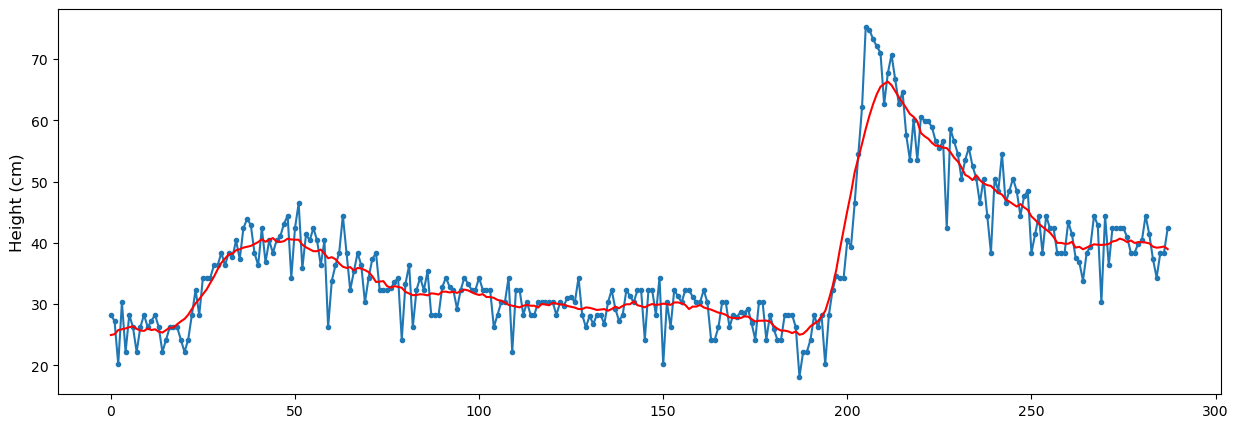

In [81]:
# menampilkan sample data 2 hari
plt.figure(figsize=(15, 5))
plt.plot(s1[500:788], '.-')
plt.plot(height_savgol1[500:788], 'r')
plt.ylabel('Height (cm)', fontsize= 12)
plt.show()

In [82]:
# all
flood_dataset2_all = flood_dataset2.copy()
flood_dataset2_all.to_csv('dataset/dataset_saved-A/dataset_A2/flood-A2_all.csv')

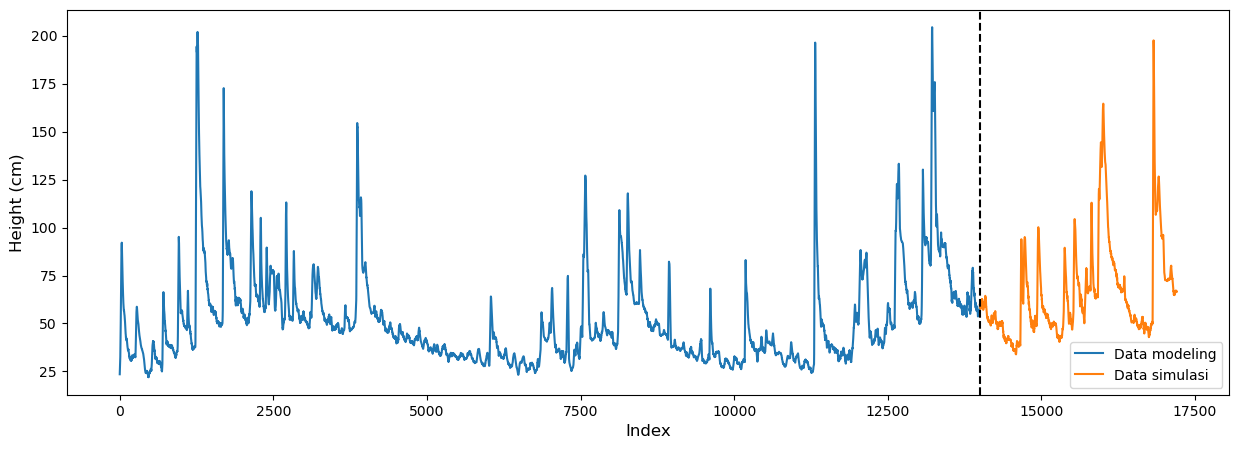

In [83]:
# slice data
flood_dataset2_all = flood_dataset2_all[:17200]

# plot data
plt.figure(figsize=(15, 5))
plt.plot(flood_dataset2_all.height[:14000], '-')
plt.plot(flood_dataset2_all.height[14000:], '-')
plt.xlabel('Index', fontsize= 12)
plt.ylabel('Height (cm)', fontsize= 12)
plt.axvline(14000, color='black', linestyle='--')
plt.legend(['Data modeling', 'Data simulasi'], loc='lower right')

In [84]:
# jumlah data
print('Total jumlah data modeling:', len(flood_dataset2_all[:14000]))
print('Total jumlah data simulasi:', len(flood_dataset2_all[14000:]))

Total jumlah data modeling: 14000
Total jumlah data simulasi: 3200


In [85]:
# SPLIT
# save data modeling
flood_dataset2_mod = flood_dataset2_all[:14000]
flood_dataset2_mod.to_csv('dataset/dataset_saved-A/dataset_A2/flood-A2_modeling.csv')

# save data simulasi
flood_dataset2_simulasi = flood_dataset2_all[14000:]
flood_dataset2_simulasi.to_csv('dataset/dataset_saved-A/dataset_A2/flood-A2_simulasi.csv')

### 3. Dataset (banjir & cuaca smoothing)

In [86]:
flood_dataset3 = flood_dataset2.copy()

In [87]:
flood_dataset3.head()

,date,height,temp,feelslike,dew,humidity,precip,precipprob,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,severerisk
0,03/06/2022 00:00,23.52,18.7,18.7,17.6,93.32,0.0,0,3.6,4.7,68.5,1014,100.0,24.1,10
1,03/06/2022 00:10,24.45,18.7,18.7,17.6,93.32,0.0,0,3.6,4.7,68.5,1014,100.0,24.1,10
2,03/06/2022 00:20,25.37,18.7,18.7,17.6,93.32,0.0,0,3.6,4.7,68.5,1014,100.0,24.1,10
3,03/06/2022 00:30,26.29,18.7,18.7,17.6,93.32,0.0,0,3.6,4.7,68.5,1014,100.0,24.1,10
4,03/06/2022 00:40,27.21,18.7,18.7,17.6,93.32,0.0,0,3.6,4.7,68.5,1014,100.0,24.1,10


In [88]:
# Daftar kolom yang akan di-smooth
col_smooth = ['temp', 'feelslike', 'dew', 'humidity', 'precip', 'windgust', 'windspeed', 'winddir', 
              'sealevelpressure', 'cloudcover', 'visibility']

# Smoothing dengan metode Savitzky-Golay
window_length = 15
polyorder = 1

for col in col_smooth:
    s_data = flood_dataset3[col].values
    smoothed_data = savgol_filter(s_data, window_length=window_length, polyorder=polyorder)
    flood_dataset3[col] = smoothed_data.round(2)

# Hasil smoothing telah diterapkan ke semua kolom dalam col_smooth

In [89]:
flood_dataset3.head()

,date,height,temp,feelslike,dew,humidity,precip,precipprob,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,severerisk
0,03/06/2022 00:00,23.52,18.67,18.67,17.63,93.69,0.0,0,3.57,4.65,68.08,1014.32,100.0,24.1,10
1,03/06/2022 00:10,24.45,18.68,18.68,17.62,93.51,0.0,0,3.61,4.72,68.60,1014.16,100.0,24.1,10
2,03/06/2022 00:20,25.37,18.70,18.70,17.60,93.32,0.0,0,3.65,4.78,69.11,1014.00,100.0,24.1,10
3,03/06/2022 00:30,26.29,18.72,18.72,17.58,93.14,0.0,0,3.69,4.85,69.63,1013.84,100.0,24.1,10
4,03/06/2022 00:40,27.21,18.73,18.73,17.57,92.95,0.0,0,3.72,4.92,70.15,1013.68,100.0,24.1,10


In [90]:
# all
flood_dataset3_all = flood_dataset3.copy()
flood_dataset3_all.to_csv('dataset/dataset_saved-A/dataset_A3/flood-A3_all.csv')

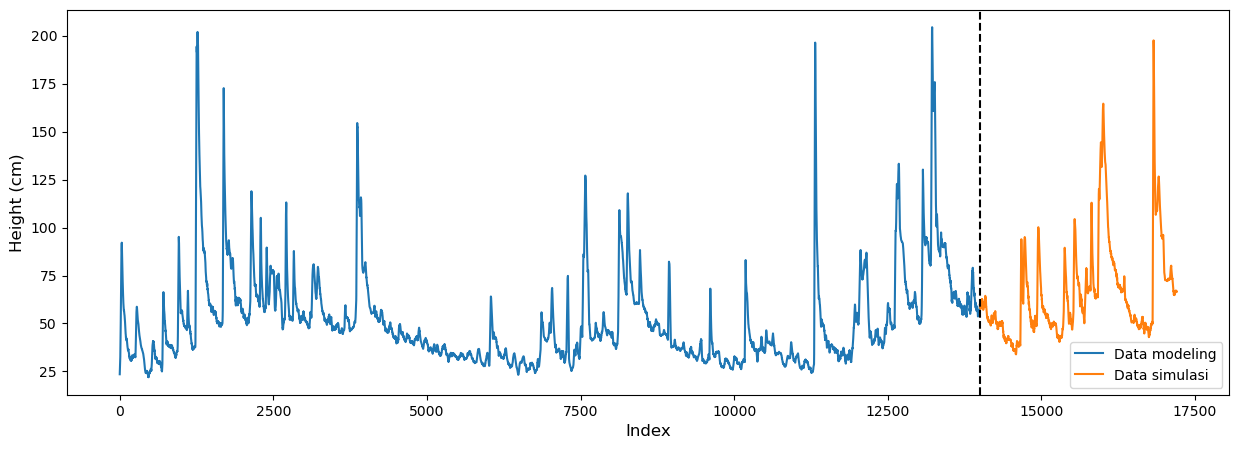

In [91]:
# slice data
flood_dataset3_all = flood_dataset3_all[:17200]

# plot data
plt.figure(figsize=(15, 5))
plt.plot(flood_dataset3_all.height[:14000], '-')
plt.plot(flood_dataset3_all.height[14000:], '-')
plt.xlabel('Index', fontsize= 12)
plt.ylabel('Height (cm)', fontsize= 12)
plt.axvline(14000, color='black', linestyle='--')
plt.legend(['Data modeling', 'Data simulasi'], loc='lower right')

In [92]:
# jumlah data
print('Total jumlah data modeling:', len(flood_dataset3_all[:14000]))
print('Total jumlah data simulasi:', len(flood_dataset3_all[14000:]))

Total jumlah data modeling: 14000
Total jumlah data simulasi: 3200


In [93]:
# SPLIT
# save data modeling
flood_dataset3_mod = flood_dataset3_all[:14000]
flood_dataset3_mod.to_csv('dataset/dataset_saved-A/dataset_A3/flood-A3_modeling.csv')

# save data simulasi
flood_dataset3_simulasi = flood_dataset3_all[14000:]
flood_dataset3_simulasi.to_csv('dataset/dataset_saved-A/dataset_A3/flood-A3_simulasi.csv')

---